In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Name of the CSV file
file = '../Resources/US_Accidents_May19.csv'
df = pd.read_csv(file)

In [73]:
# Add a column to sort by year
df["Start_Year"] = df["Start_Time"].agg(lambda x: x.split("-")[0])

# remove years with incomplete data
df = df[df["Start_Year"] != "2019"]
df = df[df["Start_Year"] != "2015"]

# Count total traffic incidents by year
df_years = df.groupby("Start_Year").count()
total_accidents_per_year = df_years["ID"].tolist()

In [74]:
# List of traffic infrastructure
infrastructure_list = ["Amenity","Bump","Crossing","Give_Way","Junction","No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop"]

# Set up lists for loop
accident_data_2016 = []
accident_data_2017 = []
accident_data_2018 = []

# Select years to look for
years = ["2016","2017","2018"]

# Loop through traffic infrastructure types and pull out data based on year
i = 0
for year in years:
    for traffic_type in infrastructure_list:
        if year == "2016":
            accident_data_2016.append(df[traffic_type].loc[(df[traffic_type] == True) & (df["Start_Year"] == year)].count())
        elif year == "2017":
            accident_data_2017.append(df[traffic_type].loc[(df[traffic_type] == True) & (df["Start_Year"] == year)].count())
        elif year == "2018":
            accident_data_2018.append(df[traffic_type].loc[(df[traffic_type] == True) & (df["Start_Year"] == year)].count())

In [75]:
# percent of accidents near traffic infastructure per year
accident_data_sum = []
accident_data_sum.append(sum(accident_data_2016))
accident_data_sum.append(sum(accident_data_2017))
accident_data_sum.append(sum(accident_data_2018))

i = 0
infra_percents = []
for i in range(0,3):
    infra_percents.append(accident_data_sum[i]/total_accidents_per_year[i])

[0.3589689260376862, 0.3579520272059541, 0.34141250963451575]


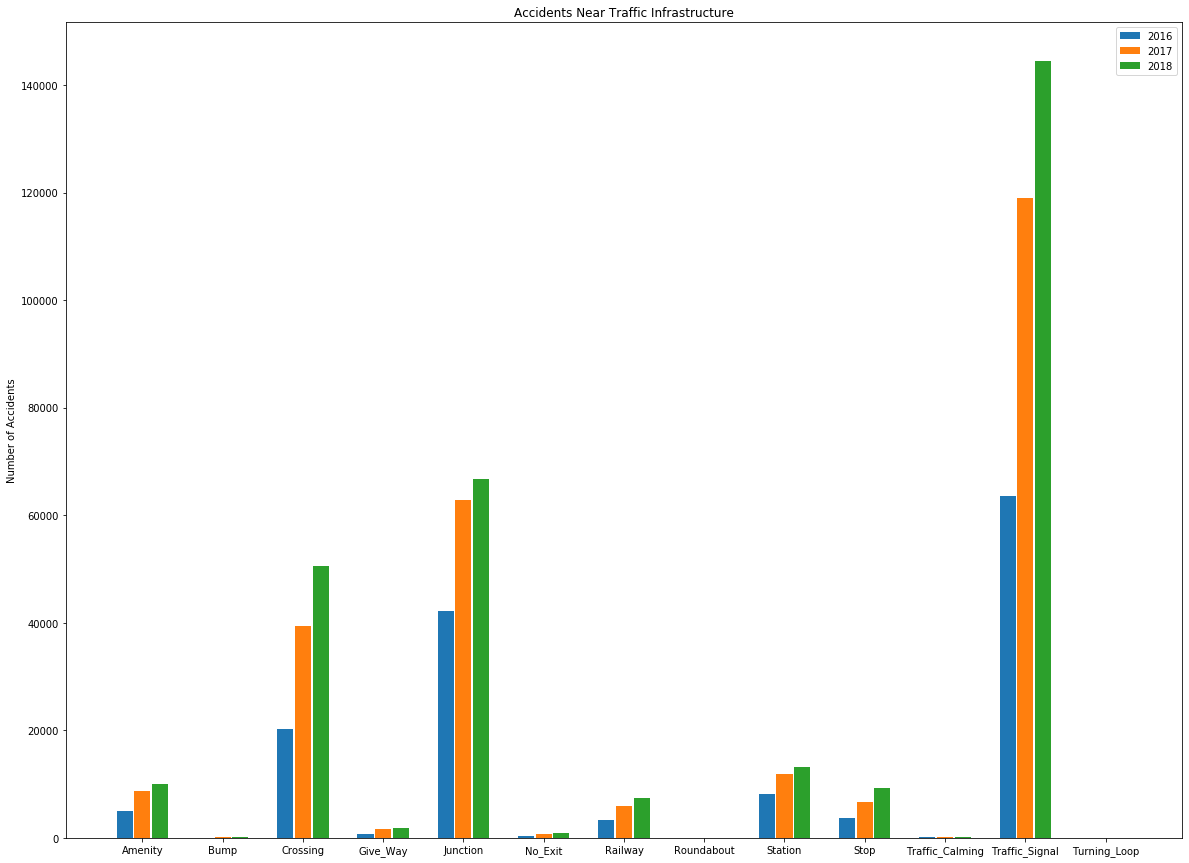

In [77]:
# Set up graph for all three years of data

x = np.arange(len(infrastructure_list))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width*1.1, accident_data_2016, width, label='2016')
rects2 = ax.bar(x, accident_data_2017, width, label='2017')
rects3 = ax.bar(x + width*1.1, accident_data_2018, width, label='2018')

ax.set_ylabel('Number of Accidents')
ax.set_title('Accidents Near Traffic Infrastructure')
ax.set_xticks(x)
ax.set_xticklabels(infrastructure_list)
ax.legend()
#plt.show()

In [69]:
# remove 2015 and 2019 values from data frame
df = df[df["Start_Year"] != "2019"]
df = df[df["Start_Year"] != "2015"]

grouped_years = df.groupby("Start_Year").count()
incidents_per_year = grouped_years["ID"].tolist()

# convert street name to list
street_types = ["I-","State Route","Fwy","US-","Pike","CA-","Hwy"]
all_street_types = ["I-","State Route","Fwy","US-","Pike","CA-","Hwy","Local Road"]

streets_2016 = []
streets_2017 = []
streets_2018 = []

#for year in years:
i = 0
for year in years:
    for street_type in street_types:
        if year == "2016":
            streets_2016.append(df["Street"].loc[(df["Street"].str.contains(street_type)==True) & (df["Start_Year"] == year)].count())
        elif year == "2017":
            streets_2017.append(df["Street"].loc[(df["Street"].str.contains(street_type)==True) & (df["Start_Year"] == year)].count())
        elif year == "2018":
            streets_2018.append(df["Street"].loc[(df["Street"].str.contains(street_type)==True) & (df["Start_Year"] == year)].count())

streets_2016.append(incidents_per_year[0]-sum(streets_2016))
streets_2017.append(incidents_per_year[1]-sum(streets_2017))
streets_2018.append(incidents_per_year[2]-sum(streets_2018))

In [70]:
location_type_df = pd.DataFrame(list(zip(streets_2016,streets_2017,streets_2018)),columns=["2016","2017","2018"],index=all_street_types)
location_type_df.head(10)

,2016,2017,2018
I-,94733,157315,197572
State Route,2366,3811,3841
Fwy,34621,42414,42722
US-,17298,29972,32461
Pike,2936,5195,5860
CA-,15424,18287,20475
Hwy,9982,18293,27476
Local Road,233241,442203,562217


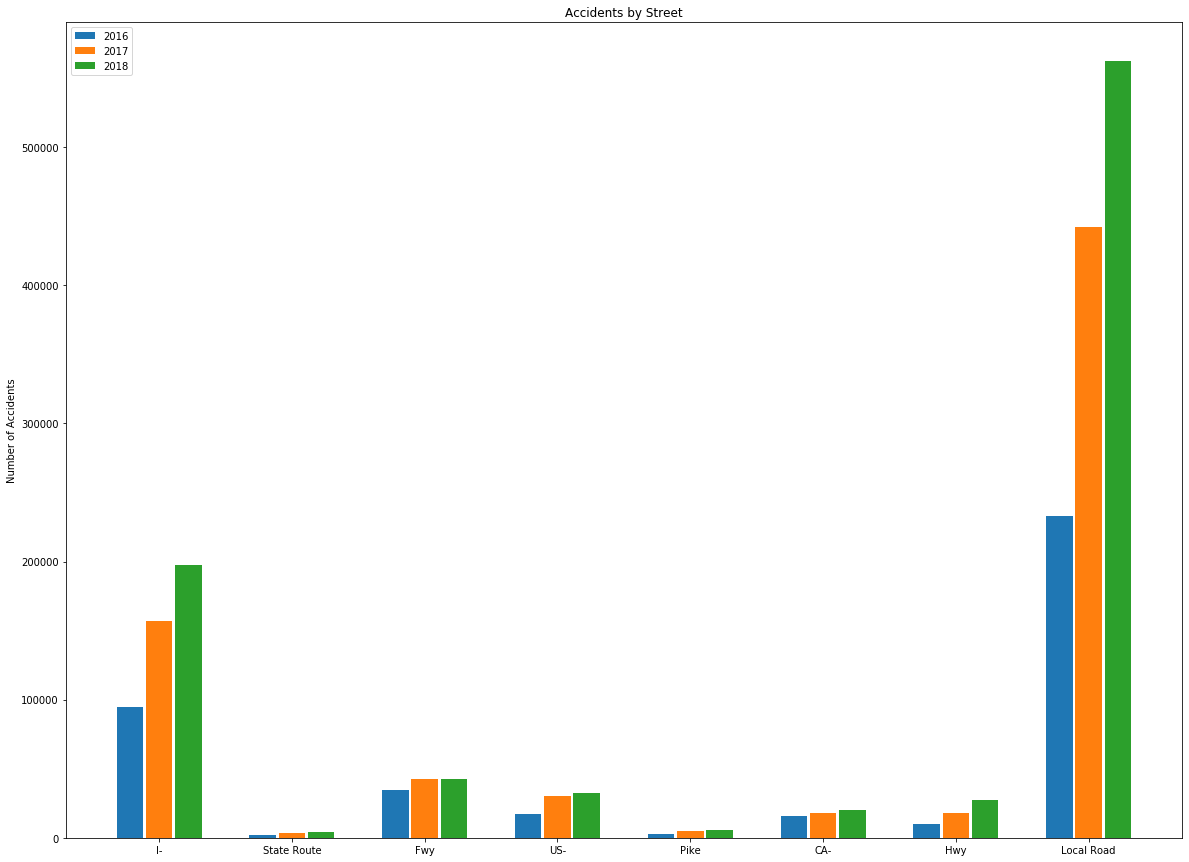

In [72]:
x = np.arange(len(all_street_types))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width*1.1, streets_2016, width, label='2016')
rects2 = ax.bar(x, streets_2017, width, label='2017')
rects3 = ax.bar(x + width*1.1, streets_2018, width, label='2018')

ax.set_ylabel('Number of Accidents')
ax.set_title('Accidents by Street')
ax.set_xticks(x)
ax.set_xticklabels(all_street_types)
ax.legend()